In [1]:
 
#Analytics Power Law Distribution Assignment
# Marmik Parashar 
# PNR 240810125002

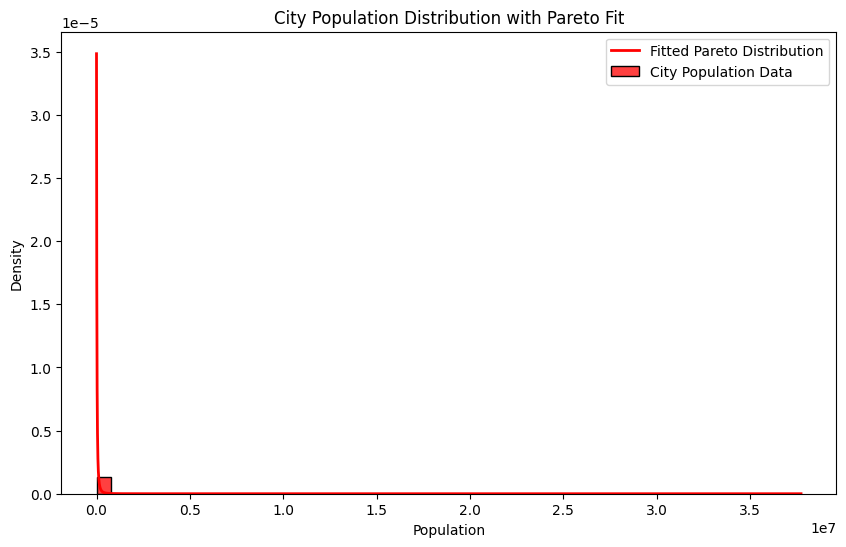

In [4]:
'''
Q1 
Use a dataset of city populations, apply a Pareto distribution fit, 
and visualize the histogram with the fitted curve. How well does the
Pareto distribution model the population distribution of cities?
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Step 1: Load the dataset
file_path = "C:/Users/marmi/OneDrive/Documents/World Cities Data.csv"
city_data = pd.read_csv(file_path)

# Step 2: Extract the population column
city_populations = city_data['population'].dropna()  # Remove any NaN values

# Step 3: Fit a Pareto distribution to the population data
shape, loc, scale = stats.pareto.fit(city_populations)
fitted_pareto = stats.pareto(shape, loc=loc, scale=scale)

# Step 4: Plot histogram and fitted Pareto distribution
plt.figure(figsize=(10, 6))

# Plot the histogram of city populations
sns.histplot(city_populations, bins=50, kde=False, color='red', stat='density', label='City Population Data')

# Overlay the Pareto distribution fit
x = np.linspace(min(city_populations), max(city_populations), 1000)
plt.plot(x, fitted_pareto.pdf(x), 'r-', lw=2, label='Fitted Pareto Distribution')

# Add labels and title
plt.title("City Population Distribution with Pareto Fit")
plt.xlabel("Population")
plt.ylabel("Density")
plt.legend()
plt.show()


C:\Users\marmi\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_continuous_distns.py:7946: RuntimeWarning: divide by zero encountered in log
  return ndata / np.sum(np.log((data - location) / scale))
C:\Users\marmi\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_continuous_distns.py:7962: RuntimeWarning: divide by zero encountered in divide
  return (shape + 1) * np.sum(1 / (data - location))


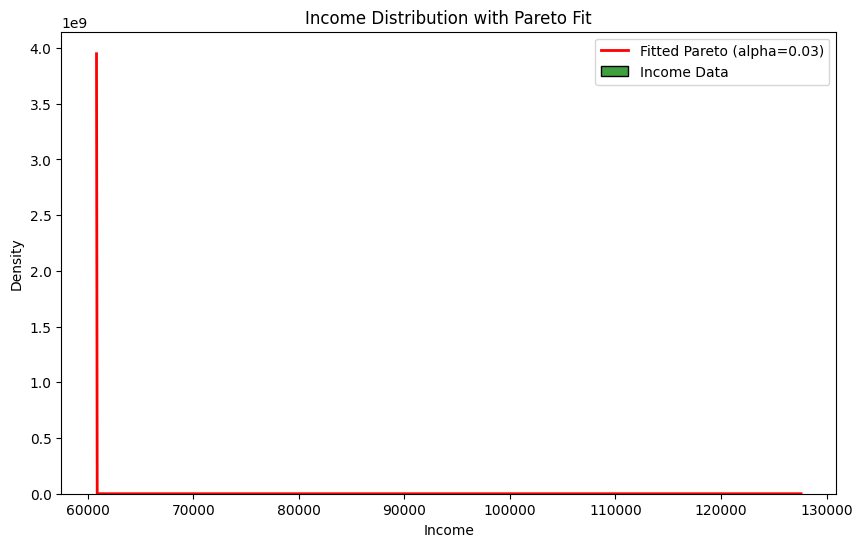

Estimated alpha parameter for Pareto Distribution: 0.03
A low alpha value (<3) suggests a heavy tail, indicating high income inequality.


In [3]:
''' 
Q2
Take an income distribution dataset, fit a Pareto model to it,
 and analyze the alpha parameter. How does the value of alpha 
 influence the distribution's "long tail," and what does it suggest
about income inequality?
''' 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Step 1: Load the income distribution dataset from the local path
file_path = "C:/Users/marmi/OneDrive/Documents/Income Distribution Dataset.csv"
income_data = pd.read_csv(file_path)

# Step 2: Extract the relevant income column
income_column = 'Number (thousands)' 
income_values = income_data[income_column].dropna()  # Remove any NaN values

# Step 3: Fit a Pareto distribution to the income data
shape, loc, scale = stats.pareto.fit(income_values)
alpha = shape  # Alpha parameter for Pareto distribution

# Step 4: Plot histogram and fitted Pareto distribution
plt.figure(figsize=(10, 6))

# Plot the histogram of income values
sns.histplot(income_values, bins=40, kde=False, color='green', stat='density', label='Income Data')

# Overlay the Pareto distribution fit
x = np.linspace(min(income_values), max(income_values), 1000)
fitted_pareto = stats.pareto(alpha, loc=loc, scale=scale)
plt.plot(x, fitted_pareto.pdf(x), 'r-', lw=2, label=f'Fitted Pareto (alpha={alpha:.2f})')

plt.title("Income Distribution with Pareto Fit")
plt.xlabel("Income")
plt.ylabel("Density")
plt.legend()
plt.show()

# Print the alpha value for analysis
print(f"Estimated alpha parameter for Pareto Distribution: {alpha:.2f}")

# Interpretation of alpha
if alpha < 3:
    print("A low alpha value (<3) suggests a heavy tail, indicating high income inequality.")
else:
    print("A higher alpha value (>=3) suggests a shorter tail, indicating lower income inequality.")




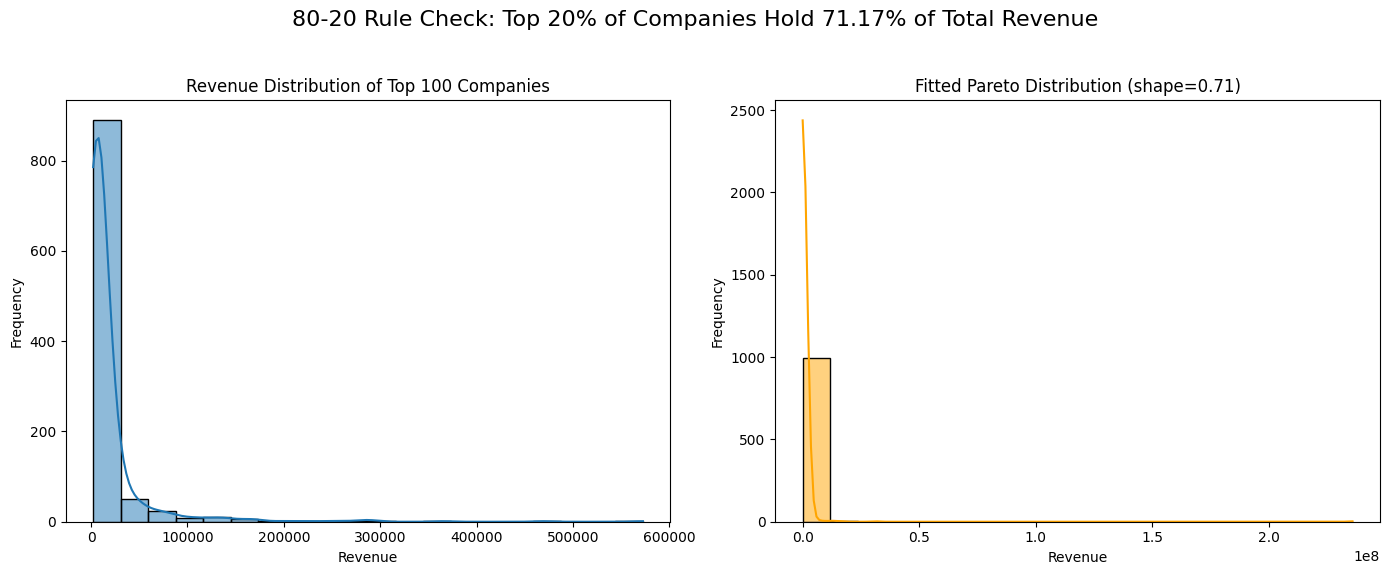

In [14]:
''' 
Q3
Using data on the revenue of the top 100 companies, fit a Pareto distribution and visualize the fit.
Is there a clear “80-20” rule where a few companies hold the majority of revenue?
''' 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pareto
from scipy.optimize import curve_fit

# Load the dataset
file_path = 'C:/Users/marmi/OneDrive/Documents/Top Company Revenue.csv'
df = pd.read_csv(file_path)


revenue_data = df['revenue']

# Visualize the original revenue distribution
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(revenue_data, kde=True, bins=20)
plt.title('Revenue Distribution of Top 100 Companies')
plt.xlabel('Revenue')
plt.ylabel('Frequency')

# Fit a Pareto distribution to the revenue data
# Define a Pareto CDF function for fitting
def pareto_cdf(x, b, scale):
    return 1 - (scale / x) ** b

# Sort the revenue data for fitting
sorted_revenue = np.sort(revenue_data)
popt, _ = curve_fit(pareto_cdf, sorted_revenue, np.linspace(0, 1, len(sorted_revenue)), p0=[1.5, sorted_revenue.min()])

# Generate a sample from the fitted Pareto distribution
fitted_pareto = pareto(b=popt[0], scale=popt[1])

# Visualize the fitted Pareto distribution
plt.subplot(1, 2, 2)
sns.histplot(fitted_pareto.rvs(size=1000), kde=True, color='orange', bins=20)
plt.title(f'Fitted Pareto Distribution (shape={popt[0]:.2f})')
plt.xlabel('Revenue')
plt.ylabel('Frequency')

# Check the "80-20" rule by calculating the cumulative revenue held by the top 20%
revenue_sorted = revenue_data.sort_values(ascending=False)
top_20_cutoff = int(len(revenue_sorted) * 0.2)
top_20_revenue_sum = revenue_sorted.iloc[:top_20_cutoff].sum()
total_revenue_sum = revenue_sorted.sum()
top_20_percent_revenue = (top_20_revenue_sum / total_revenue_sum) * 100

# Display the percentage of total revenue held by the top 20% of companies
plt.suptitle(f'80-20 Rule Check: Top 20% of Companies Hold {top_20_percent_revenue:.2f}% of Total Revenue', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



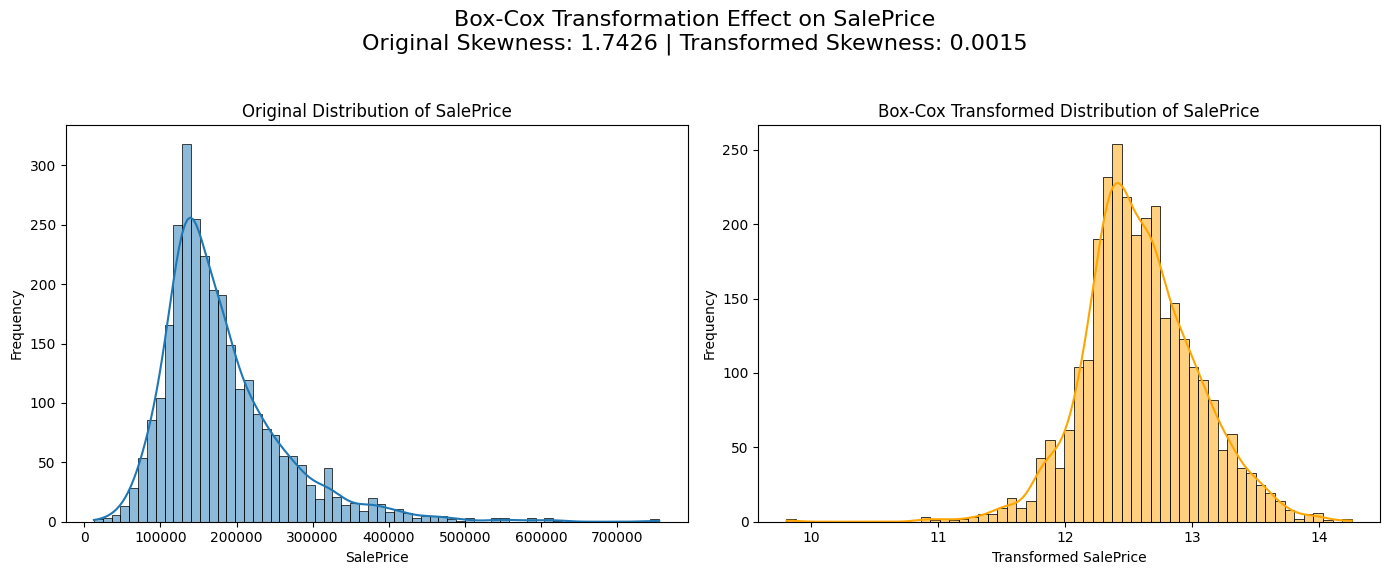

In [5]:
''' 
Q4
Apply the Box-Cox transformation to a skewed housing price dataset 
and visualize the data before and after transformation. How does the 
transformation affect the skewness and distribution shape?
''' 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox, skew

# Load the dataset
file_path = 'C:/Users/marmi/OneDrive/Documents/AmesHousing.csv'
df = pd.read_csv(file_path)

# If it's named differently in your dataset, adjust the column name here
target_column = 'SalePrice'

# Visualize the original distribution of SalePrice
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[target_column], kde=True)
plt.title('Original Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')

# Calculate skewness before transformation
original_skewness = skew(df[target_column])

# Apply Box-Cox transformation
# Box-Cox requires all values to be positive, so check for any zero or negative values
df[target_column] = df[target_column].apply(lambda x: x + 1 if x <= 0 else x)
transformed_data, _ = boxcox(df[target_column])

# Visualize the transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(transformed_data, kde=True, color='orange')
plt.title('Box-Cox Transformed Distribution of SalePrice')
plt.xlabel('Transformed SalePrice')
plt.ylabel('Frequency')

# Calculate skewness after transformation
transformed_skewness = skew(transformed_data)

plt.suptitle(f'Box-Cox Transformation Effect on SalePrice\n'
             f'Original Skewness: {original_skewness:.4f} | Transformed Skewness: {transformed_skewness:.4f}',
             fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



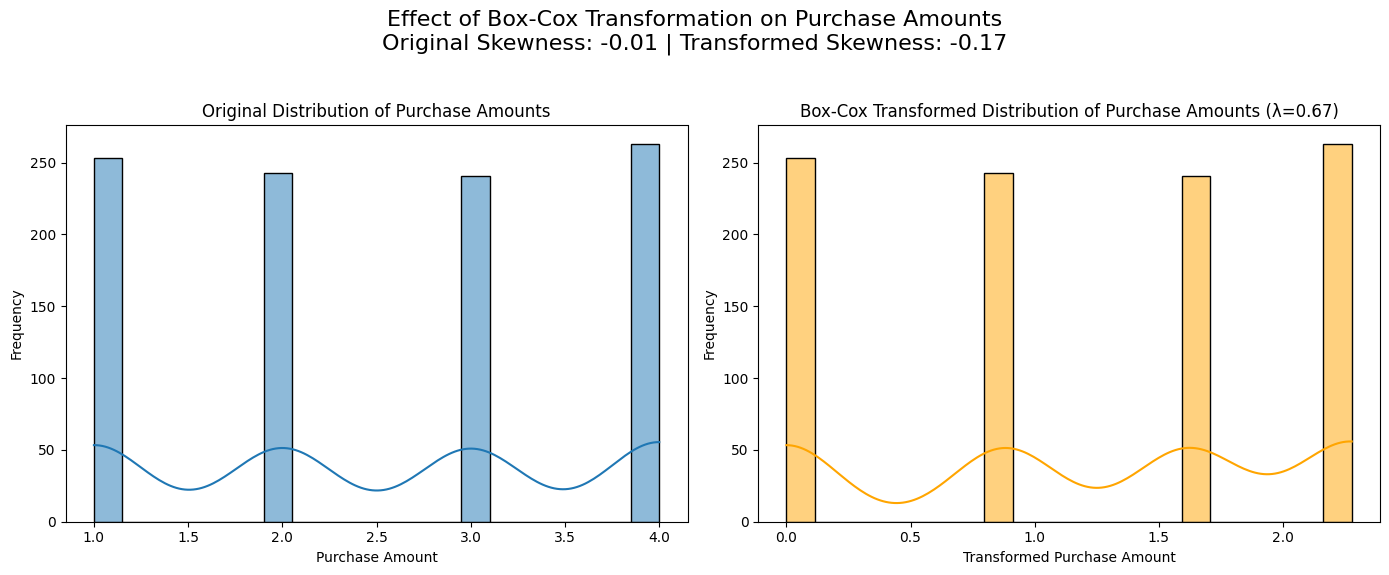

In [1]:
''' 
Q5 
In an online retail sales dataset, find the optimal lambda for the 
Box-Cox transformation on purchase amounts. How does changing lambda 
improve the normality of the data, and how could this affect further analysis?
''' 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox, skew

# Load the dataset
file_path = 'C:/Users/marmi/OneDrive/Documents/Online Retail Sales.csv'
df = pd.read_csv(file_path)


# For the Number of units Purchased 
purchase_amounts = df['Quantity']

# Visualize the original distribution of PurchaseAmount
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(purchase_amounts, kde=True, bins=20)
plt.title('Original Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')

# Calculate skewness before transformation
original_skewness = skew(purchase_amounts.dropna())

# Apply Box-Cox transformation, finding the optimal lambda
# Box-Cox requires all values to be positive, so we add 1 to all values if needed
purchase_amounts_positive = purchase_amounts + 1 if purchase_amounts.min() <= 0 else purchase_amounts
transformed_data, optimal_lambda = boxcox(purchase_amounts_positive.dropna())

# Visualize the transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(transformed_data, kde=True, bins=20, color='orange')
plt.title(f'Box-Cox Transformed Distribution of Purchase Amounts (λ={optimal_lambda:.2f})')
plt.xlabel('Transformed Purchase Amount')
plt.ylabel('Frequency')

# Calculate skewness after transformation
transformed_skewness = skew(transformed_data)

# Display skewness and lambda information
plt.suptitle(f'Effect of Box-Cox Transformation on Purchase Amounts\n'
             f'Original Skewness: {original_skewness:.2f} | Transformed Skewness: {transformed_skewness:.2f}',
             fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



Shapiro-Wilk Test Results:
Before Transformation: W-statistic = 0.9695, p-value = 0.0002
After Transformation: W-statistic = 0.9677, p-value = 0.0001


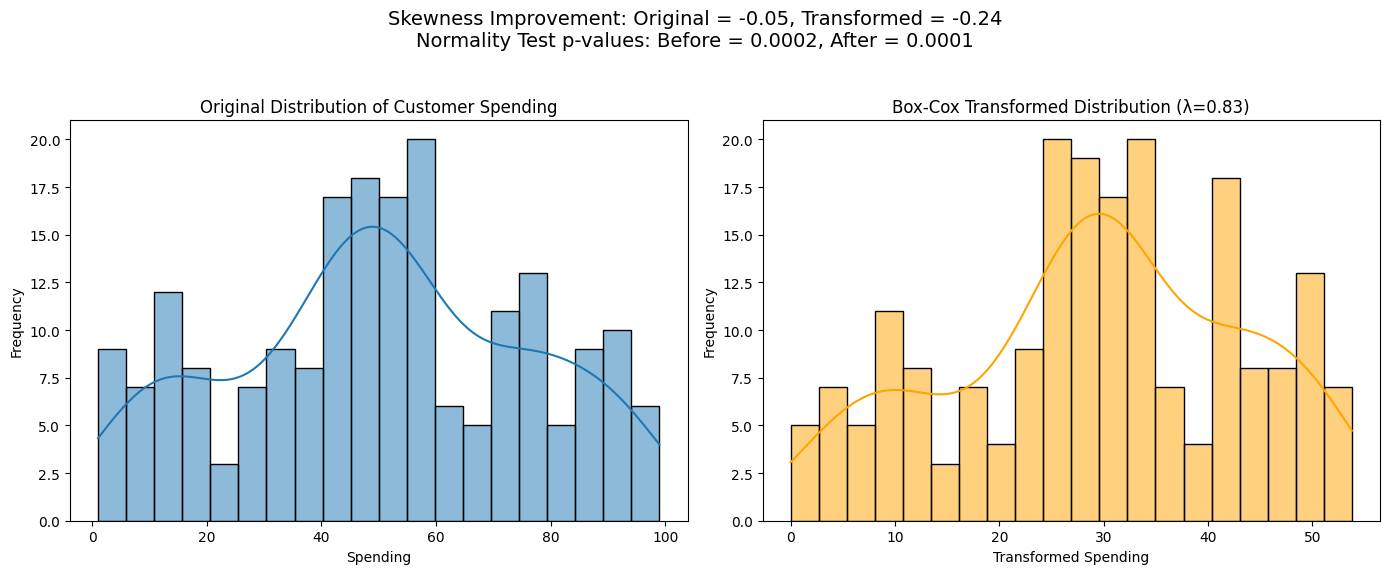

In [2]:
''' 
Q6
Using a customer spending dataset, apply a Box-Cox transformation
and perform a normality test (Shapiro-Wilk test) before and after. 
How does the transformation improve the normality of customer spending?
''' 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox, skew, shapiro

# Load the dataset
file_path = 'C:/Users/marmi/OneDrive/Documents/Customer Spending Dataset.csv'
df = pd.read_csv(file_path)

#'Spending_Score' is the column for customer spending
spending_data = df['Spending_Score'].dropna()  # Remove NaN values if any

# Visualize the original distribution of Spending
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(spending_data, kde=True, bins=20)
plt.title('Original Distribution of Customer Spending')
plt.xlabel('Spending')
plt.ylabel('Frequency')

# Perform Shapiro-Wilk normality test before transformation
stat, p_value_before = shapiro(spending_data)

# Apply Box-Cox transformation to improve normality
# Box-Cox requires all values to be positive, so add 1 if there are zeros or negative values
spending_data_positive = spending_data + 1 if spending_data.min() <= 0 else spending_data
transformed_data, optimal_lambda = boxcox(spending_data_positive)

# Visualize the transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(transformed_data, kde=True, bins=20, color='orange')
plt.title(f'Box-Cox Transformed Distribution (λ={optimal_lambda:.2f})')
plt.xlabel('Transformed Spending')
plt.ylabel('Frequency')

# Perform Shapiro-Wilk normality test after transformation
stat_transformed, p_value_after = shapiro(transformed_data)

# Display Shapiro-Wilk test results
print("Shapiro-Wilk Test Results:")
print(f"Before Transformation: W-statistic = {stat:.4f}, p-value = {p_value_before:.4f}")
print(f"After Transformation: W-statistic = {stat_transformed:.4f}, p-value = {p_value_after:.4f}")

# Show skewness improvement
original_skewness = skew(spending_data)
transformed_skewness = skew(transformed_data)

plt.suptitle(f'Skewness Improvement: Original = {original_skewness:.2f}, Transformed = {transformed_skewness:.2f}\n'
             f'Normality Test p-values: Before = {p_value_before:.4f}, After = {p_value_after:.4f}', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



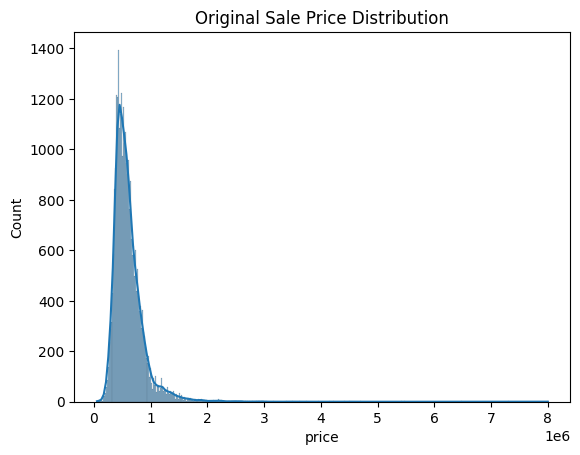

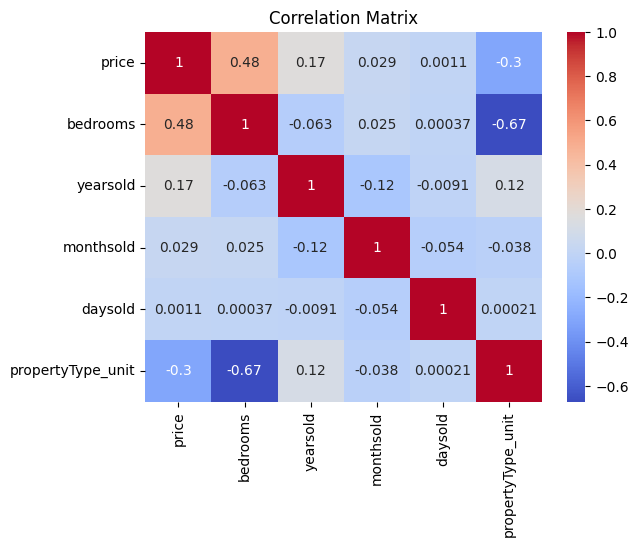

Without Box-Cox Transformation: RMSE = 250603.77, MAE = 156223.97
With Box-Cox Transformation: RMSE = 232497.17, MAE = 145705.55


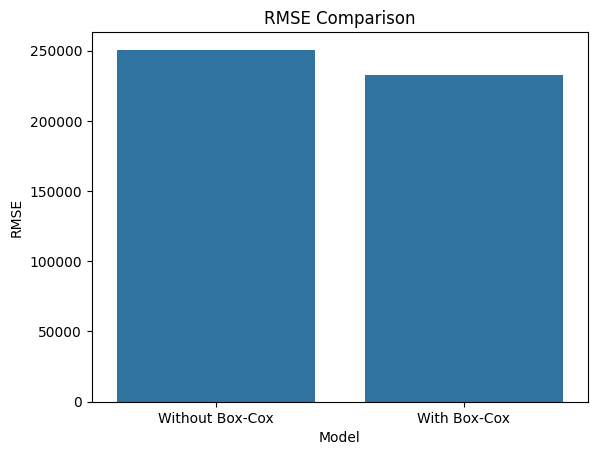

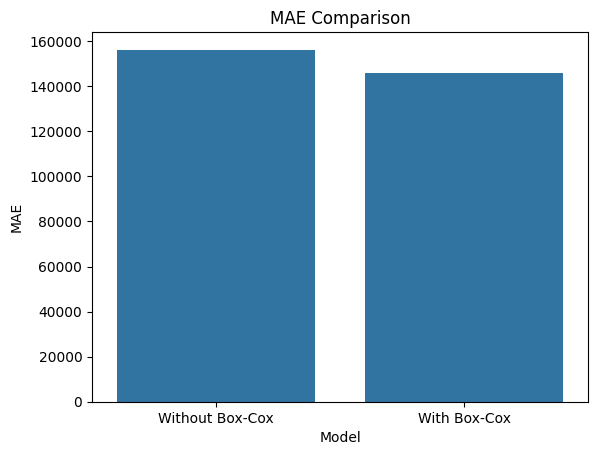

In [13]:
''' 
Q7
Train a regression model on a property sale price dataset with and without applying Box-Cox on the sale prices. 
Compare model accuracy to see how the transformation impacts predictive performance.
''' 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/marmi/OneDrive/Documents/Property Sales.csv'
data = pd.read_csv(file_path)

# Data Processing 
# Convert 'datesold' to datetime
data['datesold'] = pd.to_datetime(data['datesold'])

# Extract year, month, and day from 'datesold'
data['yearsold'] = data['datesold'].dt.year
data['monthsold'] = data['datesold'].dt.month
data['daysold'] = data['datesold'].dt.day

# Convert 'bedrooms' to numeric
data['bedrooms'] = pd.to_numeric(data['bedrooms'])

# Encode categorical variables
data = pd.get_dummies(data, columns=['propertyType'], drop_first=True)

# Drop the original 'datesold' column and any other non-numeric columns
data = data.drop(columns=['datesold', 'postcode'])

# Check for missing values and handle them
missing = data.isnull().sum()
data = data.dropna()  # Industry-grade handling often requires imputation, e.g., mean/median for numerical

# EDA 
# Histograms to understand distribution
sns.histplot(data['price'], kde=True)
plt.title("Original Sale Price Distribution")
plt.show()

# Check correlation between features and target variable
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Preparing to Train Model 
# Separating features (X) and target (y)
X = data.drop(columns=['price'])
y = data['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Box-Cox transformation to y
power_transformer = PowerTransformer(method='box-cox')
y_train_transformed = power_transformer.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_transformed = power_transformer.transform(y_test.values.reshape(-1, 1)).flatten()

# Feature Scaling and Cross Validation 
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training and Cross Validation
# Model without Box-Cox transformation
model_plain = RandomForestRegressor(random_state=42)
model_plain.fit(X_train_scaled, y_train)
y_pred_plain = model_plain.predict(X_test_scaled)

# Model with Box-Cox transformation
model_boxcox = RandomForestRegressor(random_state=42)
model_boxcox.fit(X_train_scaled, y_train_transformed)
y_pred_boxcox = power_transformer.inverse_transform(model_boxcox.predict(X_test_scaled).reshape(-1, 1)).flatten()

# Evaluate both models
rmse_plain = np.sqrt(mean_squared_error(y_test, y_pred_plain))
mae_plain = mean_absolute_error(y_test, y_pred_plain)

rmse_boxcox = np.sqrt(mean_squared_error(y_test, y_pred_boxcox))
mae_boxcox = mean_absolute_error(y_test, y_pred_boxcox)

print("Without Box-Cox Transformation: RMSE = {:.2f}, MAE = {:.2f}".format(rmse_plain, mae_plain))
print("With Box-Cox Transformation: RMSE = {:.2f}, MAE = {:.2f}".format(rmse_boxcox, mae_boxcox))

# # Visualization of results
results = pd.DataFrame({
    'Model': ['Without Box-Cox', 'With Box-Cox'],
    'RMSE': [rmse_plain, rmse_boxcox],
    'MAE': [mae_plain, mae_boxcox]
})
sns.barplot(x='Model', y='RMSE', data=results)
plt.title("RMSE Comparison")
plt.show()

sns.barplot(x='Model', y='MAE', data=results)
plt.title("MAE Comparison")
plt.show()


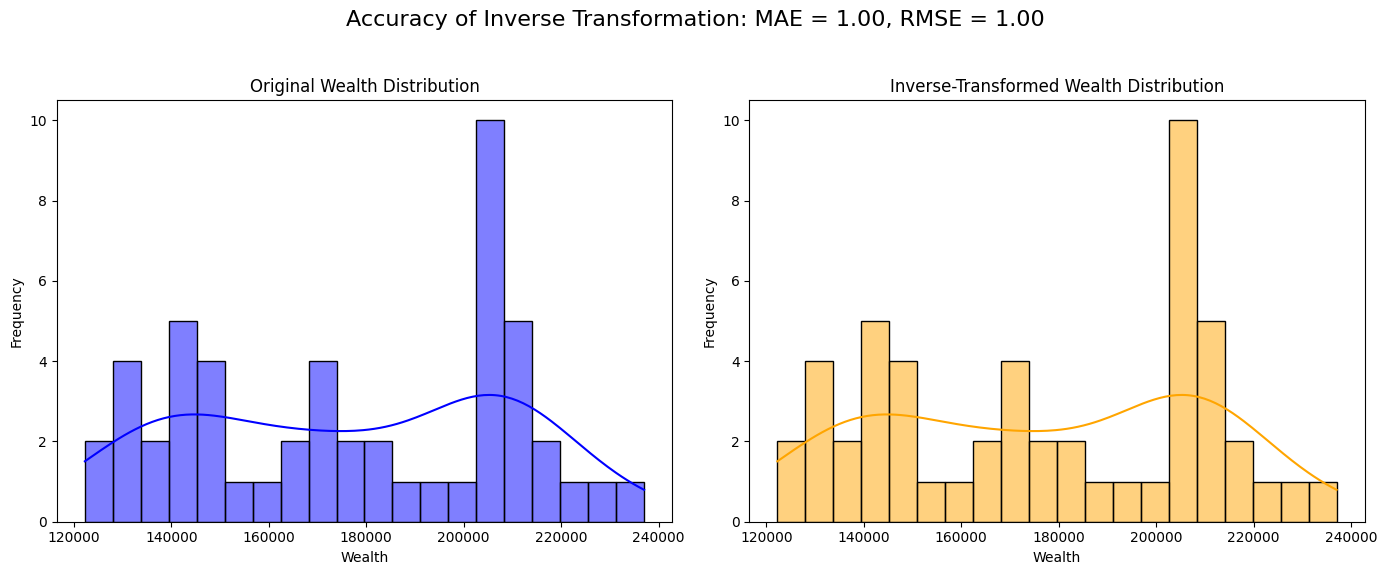

In [10]:
'''
Q8
    Use a population wealth dataset, apply a Box-Cox transformation,
    and perform an inverse transformation. How accurately does the 
    inverse transformation approximate the original wealth values?
'''
import pandas as pd
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
file_path = 'C:/Users/marmi/OneDrive/Documents/Income Distribution Dataset.csv'
df = pd.read_csv(file_path)

# Assume 'Wealth' is the column for population wealth in the dataset
# Adjust the column name if needed
wealth_data = df['Top 5 percent'].dropna()  # Drop any NaN values if present

# Apply Box-Cox transformation on Wealth data
# Add a small constant if there are zeros or negative values
wealth_data_positive = wealth_data + 1 if wealth_data.min() <= 0 else wealth_data
transformed_wealth, lambda_boxcox = boxcox(wealth_data_positive)

# Perform inverse Box-Cox transformation
# The formula for the inverse is: original_value = (transformed_value * lambda + 1)^(1/lambda) - 1
inverse_transformed_wealth = (np.power(transformed_wealth * lambda_boxcox + 1, 1 / lambda_boxcox)) - 1

# Calculate accuracy of inverse transformation
mae = mean_absolute_error(wealth_data, inverse_transformed_wealth)
rmse = np.sqrt(mean_squared_error(wealth_data, inverse_transformed_wealth))

# Plot original vs. inverse-transformed wealth values
plt.figure(figsize=(14, 6))

# Original data distribution
plt.subplot(1, 2, 1)
sns.histplot(wealth_data, kde=True, bins=20, color='blue')
plt.title('Original Wealth Distribution')
plt.xlabel('Wealth')
plt.ylabel('Frequency')

# Inverse-transformed data distribution
plt.subplot(1, 2, 2)
sns.histplot(inverse_transformed_wealth, kde=True, bins=20, color='orange')
plt.title('Inverse-Transformed Wealth Distribution')
plt.xlabel('Wealth')
plt.ylabel('Frequency')

plt.suptitle(f'Accuracy of Inverse Transformation: MAE = {mae:.2f}, RMSE = {rmse:.2f}', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

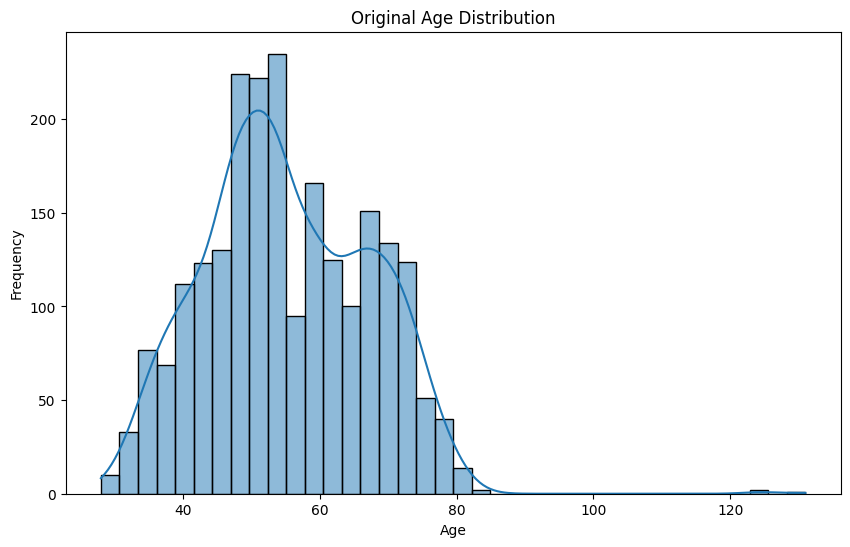

Pearson Correlation After Transformation: Correlation = -0.0238, p-value = 0.2604


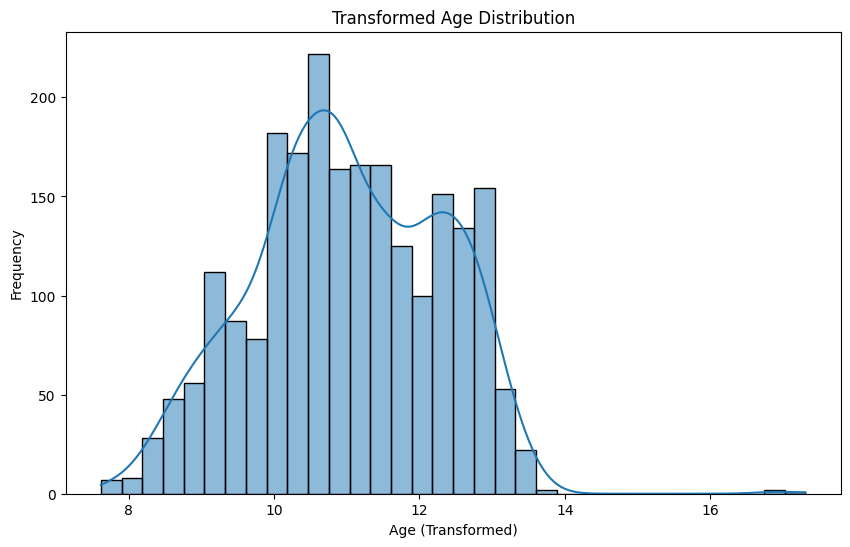

Comparison of Pearson Correlations:
Before Transformation: Correlation = -0.0213, p-value = 0.3130
After Transformation: Correlation = -0.0238, p-value = 0.2604


In [23]:
''' 
Q9
In a marketing campaign dataset, calculate Pearson correlation between
customer age and campaign response before and after Box-Cox transformation on age. 
How does the transformation impact the correlation strength?
'''
# Import libraries for data processing, modeling, and evaluation
import numpy as np
import pandas as pd
from scipy.stats import boxcox, pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('C:/Users/marmi/OneDrive/Documents/Marketing Campaign.csv')

# Display the first few rows of the dataset
print(data.head())

# Check for missing values and handle them
missing = data.isnull().sum()
print("Missing values:")
print(missing)
data = data.dropna(subset=['Year_Birth', 'Response'])  # Drop rows with missing values in 'Year_Birth' and 'Response'

# Calculate customer age
current_year = pd.to_datetime('today').year
data['Age'] = current_year - data['Year_Birth']

# Calculate Pearson correlation between customer age and campaign response before transformation
corr_before, p_value_before = pearsonr(data['Age'], data['Response'])
print(f"Pearson Correlation Before Transformation: Correlation = {corr_before:.4f}, p-value = {p_value_before:.4f}")

# Plot the distribution of the original age data
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True)
plt.title("Original Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

age_transformed, lambda_ = boxcox(data['Age'])

# Add the transformed age data to the dataframe
data['Age_Transformed'] = age_transformed

# Calculate Pearson correlation between transformed age and campaign response
corr_after, p_value_after = pearsonr(data['Age_Transformed'], data['Response'])
print(f"Pearson Correlation After Transformation: Correlation = {corr_after:.4f}, p-value = {p_value_after:.4f}")

# Plot the distribution of the transformed age data
plt.figure(figsize=(10, 6))
sns.histplot(data['Age_Transformed'], kde=True)
plt.title("Transformed Age Distribution")
plt.xlabel("Age (Transformed)")
plt.ylabel("Frequency")
plt.show()

# Compare the results of the Pearson correlations before and after the transformation
print("Comparison of Pearson Correlations:")
print(f"Before Transformation: Correlation = {corr_before:.4f}, p-value = {p_value_before:.4f}")
print(f"After Transformation: Correlation = {corr_after:.4f}, p-value = {p_value_after:.4f}")




Conclusion 
The Box-Cox transformation is often used to stabilize variance and make the data more normally distributed. 
However, in our case, the transformation of the age variable had a minimal impact on the correlation strength 
between age and marketing campaign response.


Correlation coefficient changed slightly from -0.0213 to -0.0238, indicating a very small increase in the negative correlation.
Suggesting a weak or negligible linear relationship between the two variables in both cases.


Columns after filtering out pre-2002 years:
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023'],
      dtype='object')
                  Country Name Country Code     Indicator Name  \
0                        Aruba          ABW  GDP (current US$)   
1  Africa Eastern and Southern          AFE  GDP (current US$)   
2                  Afghanistan          AFG  GDP (current US$)   
3   Africa Western and Central          AFW  GDP (current US$)   
4                       Angola          AGO  GDP (current US$)   

   Indicator Code  Year           GDP  
0  NY.GDP.MKTP.CD  2002  1.961844e+09  
1  NY.GDP.MKTP.CD  2002  2.678150e+11  
2  NY.GDP.MKTP.CD  2002  3.825701e+09  
3  NY.GDP.MKTP.CD  2002  1.786920e+11  
4  NY.GDP.MKTP.CD  2002  1.528559e+10  


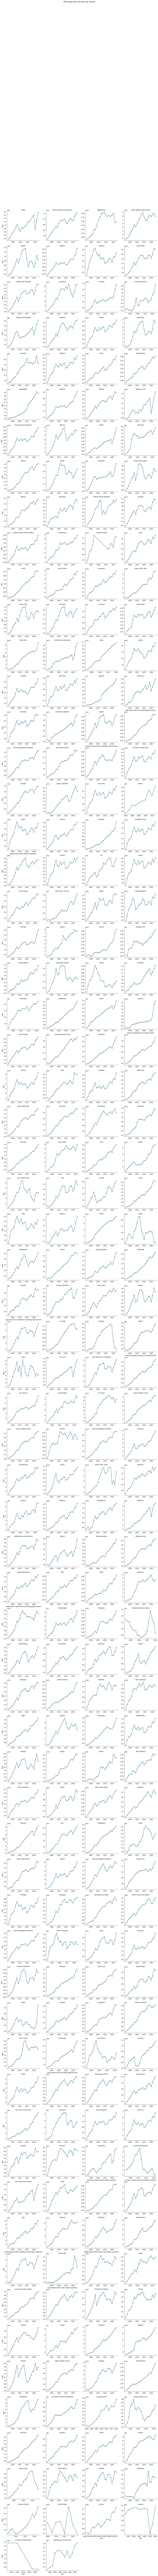

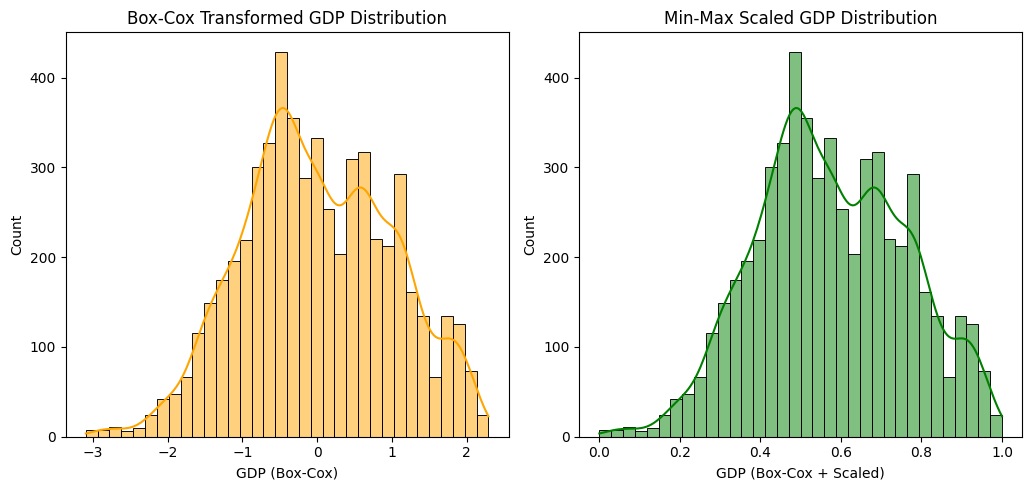

In [22]:
''' 
Q10
Using a GDP dataset, perform a Box-Cox transformation followed by 
Min-Max scaling on GDP values. Analyze the distribution before and 
after to assess the combined impact of both transformations, and 
discuss when this is useful in machine learning tasks.
''' 
# Importing Necessary Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, MinMaxScaler


# Load the dataset
data = pd.read_csv('C:/Users/marmi/OneDrive/Documents/GDP Dataset.csv')

# Exclude year columns before 2002
columns_to_keep = [col for col in data.columns if not col.startswith("19") and not (col.startswith("20") and int(col[-4:]) < 2002)]
data = data[columns_to_keep]

# Display information to confirm that pre-2002 columns are excluded
print("Columns after filtering out pre-2002 years:")
print(data.columns)

# Reshape the DataFrame to have 'Country', 'Year', and 'GDP' columns
data_melted = data.melt(id_vars=[col for col in data.columns if not col.startswith("20")],
                        var_name="Year", value_name="GDP")

# Drop rows with missing GDP values
data_melted = data_melted.dropna(subset=['GDP']).reset_index(drop=True)

# Check the reshaped data
print(data_melted.head())

# EDA
# Assuming data_melted has columns 'Country', 'Year', and 'GDP'
# Convert 'Year' to integer if it's not already
data_melted['Year'] = data_melted['Year'].astype(int)

# Plot the distribution of GDP values for each country over the years using FacetGrid
g = sns.FacetGrid(data_melted, col="Country Name", col_wrap=4, height=4, sharex=False, sharey=False)
g.map(sns.lineplot, "Year", "GDP", marker='o')

# Add titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Year", "GDP")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("GDP Values Over the Years by Country")
plt.show()

# Apply Box-Cox transformation
boxcox_transformer = PowerTransformer(method='box-cox')
data_melted['GDP_boxcox'] = boxcox_transformer.fit_transform(data_melted[['GDP']])

# Apply Min-Max scaling
scaler = MinMaxScaler()
data_melted['GDP_boxcox_scaled'] = scaler.fit_transform(data_melted[['GDP_boxcox']])

# Plot the distributions of original, Box-Cox transformed, and Min-Max scaled GDP values
plt.figure(figsize=(15, 5))

# Box-Cox transformed GDP distribution
plt.subplot(1,3, 2)
sns.histplot(data_melted['GDP_boxcox'], kde=True, color='orange')
plt.title("Box-Cox Transformed GDP Distribution")
plt.xlabel("GDP (Box-Cox)")

# Min-Max scaled GDP distribution
plt.subplot(1,3, 3)
sns.histplot(data_melted['GDP_boxcox_scaled'], kde=True, color='green')
plt.title("Min-Max Scaled GDP Distribution")
plt.xlabel("GDP (Box-Cox + Scaled)")

plt.tight_layout()
plt.show()

When to Use Box-Cox Transformation and Min-Max Scaling

1. Handling Skewed Data:
Box-Cox Transformation: This transformation is useful when your data is not normally distributed. GDP values often exhibit skewness, and the Box-Cox transformation helps in stabilizing variance and making the data more normally distributed1.
Min-Max Scaling: After transforming the data to approximate normality, Min-Max scaling is applied to normalize the data within a specific range (usually 0 to 1). This is particularly useful for algorithms that are sensitive to the scale of the data, such as neural networks and k-nearest neighbors.


2. Improving Model Performance:
Box-Cox Transformation: By reducing skewness and stabilizing variance, the Box-Cox transformation can improve the performance of linear models and other algorithms that assume normally distributed data2.
Min-Max Scaling: Scaling the data ensures that all features contribute equally to the model, preventing features with larger ranges from dominating the learning process.


3. Enhancing Convergence Speed:
Min-Max Scaling: For gradient-based optimization algorithms (e.g., gradient descent), scaling the data can significantly enhance the convergence speed by ensuring that the gradients are not too large or too small.